In [2]:
import numpy as np

In [4]:
data = np.load("MNIST_data/train.npz")
batch_xs, batch_ys = data["images"][:6000,:], data["labels"][:6000,:]
U, A, V = np.linalg.svd(batch_xs, full_matrices=True)

In [36]:
m=np.shape(U)[0]
n=np.shape(V)[0]
mn = np.min([m, n])
Lambda = np.zeros([m, n])
print(m)
Lambda[:30,:30] = np.diag(A)[:30,:30]

6000


In [37]:
A

array([  4.91612762e+02,   1.67852142e+02,   1.51734711e+02,
         1.39006958e+02,   1.30067917e+02,   1.18330238e+02,
         1.07188889e+02,   9.76069489e+01,   9.58017960e+01,
         8.62158203e+01,   8.14029617e+01,   8.03800735e+01,
         7.41697617e+01,   7.32185059e+01,   7.17188263e+01,
         6.95465393e+01,   6.51720047e+01,   6.35163765e+01,
         6.01970711e+01,   5.88157082e+01,   5.77429771e+01,
         5.63096886e+01,   5.50095367e+01,   5.36501236e+01,
         5.15245667e+01,   5.10298996e+01,   5.01945343e+01,
         4.95308418e+01,   4.69392509e+01,   4.64130058e+01,
         4.51446304e+01,   4.45662117e+01,   4.33687248e+01,
         4.27260666e+01,   4.14345856e+01,   4.12162209e+01,
         3.98870583e+01,   3.89251938e+01,   3.87253532e+01,
         3.83198204e+01,   3.76475830e+01,   3.65979881e+01,
         3.63207779e+01,   3.52429199e+01,   3.40963020e+01,
         3.34314766e+01,   3.31006622e+01,   3.30559464e+01,
         3.22246017e+01,

In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('seaborn-darkgrid')

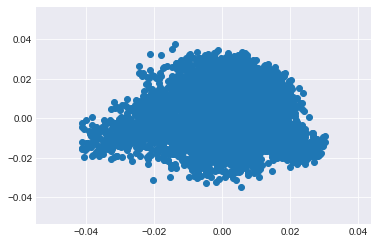

In [39]:
plt.scatter(U[:,1],U[:,2])
plt.show()

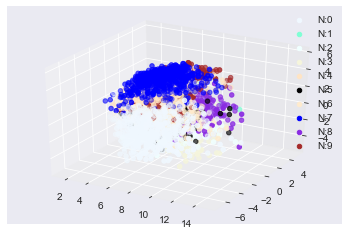

In [43]:
colors=['aliceblue',
'aquamarine',
'azure',
'beige',
'bisque',
'black',
'blanchedalmond',
'blue',
'blueviolet',
'brown',
'burlywood',
'cadetblue']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
UL=np.dot(U, Lambda)
for itr in range(10):
    ax.scatter(UL[batch_ys[:,itr]==1,0],
               UL[batch_ys[:,itr]==1,1],
               UL[batch_ys[:,itr]==1,2],
               color=colors[itr],
              label="N:%d"%itr)
plt.legend()
plt.show()

In [3]:
m=np.shape(U)[0]
n=np.shape(V)[0]
mn = np.min([m, n])
Lambda = np.zeros([m, n])
print(m)
Lambda[:30,:30] = np.diag(A)[:30,:30]

6000


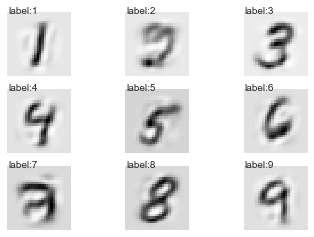

In [44]:
NEW=np.dot(U, np.dot(Lambda, V))
fig = plt.figure()
for itrx in range(3):
    for itry in range(3):
        for itmg, itlb in zip(NEW, batch_ys):
            la=np.where(itlb==np.max(itlb))[0][0]
            if(la==itrx*3+itry+1):
                ax=fig.add_subplot(3,3,la)
                ax.imshow(np.reshape(itmg,[28,28]))
                plt.text(0,0,"label:%d"%la)
                plt.xticks([])
                plt.yticks([])
                break
plt.show()

In [14]:
np.shape(V)

(784, 784)

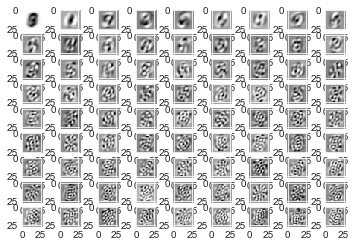

In [45]:
fig = plt.figure()
ax=[]
for itr in range(1,82):
    ax.append(fig.add_subplot(9,9,itr))
for idx, itmg in enumerate(V[:81,:]):
    ax[idx].imshow(np.reshape(itmg,[28,28]))
plt.show()

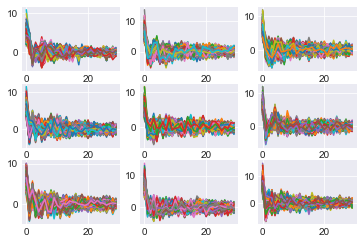

In [46]:
NEW=np.dot(U, np.dot(Lambda, V))
fig = plt.figure()
ax=[]
for itr in range(1,10):
    ax.append(fig.add_subplot(3,3,itr))
for itmg, itlb in zip(np.dot(U,Lambda)[:,:30], batch_ys):
    la=np.where(itlb==1)[0][0]
    ax[la-1].plot(itmg)
plt.show()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')
from sklearn import datasets
from sklearn.decomposition import PCA


In [48]:
pca = PCA(n_components=10)
X_r = pca.fit(batch_xs).transform(batch_xs)

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('seaborn-darkgrid')

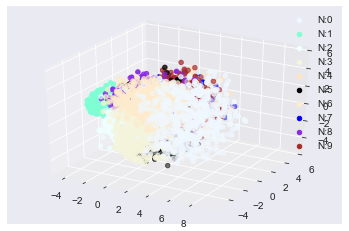

In [49]:
colors=['aliceblue',
'aquamarine',
'azure',
'beige',
'bisque',
'black',
'blanchedalmond',
'blue',
'blueviolet',
'brown',
'burlywood',
'cadetblue']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for itr in range(10):
    ax.scatter(X_r[batch_ys[:,itr]==1,0],
               X_r[batch_ys[:,itr]==1,1],
               X_r[batch_ys[:,itr]==1,2],
               color=colors[itr],
              label="N:%d"%itr)
plt.legend()
plt.show()

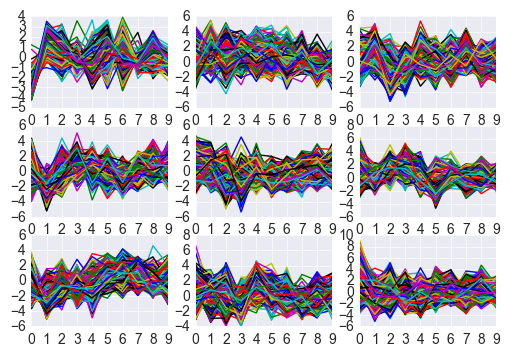

In [9]:
fig = plt.figure()
ax=[]
for itr in range(1,10):
    ax.append(fig.add_subplot(3,3,itr))
for itmg, itlb in zip(X_r, batch_ys):
    la=np.where(itlb==1)[0][0]
    ax[la-1].plot(itmg)
plt.show()

In [30]:
data = np.load("MNIST_data/train.npz")
batch_xs, batch_ys = data["images"][:6000,:], data["labels"][:6000,:]
array1=batch_xs[batch_ys[:,1]==1]
array2=batch_xs[batch_ys[:,2]==1]
array=np.concatenate([array1,array2],axis=0)
print(len(array1),len(array2))

676 600


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')
from sklearn import datasets
from sklearn.decomposition import PCA


In [31]:
pca = PCA(n_components=3)
X_r = pca.fit(array).transform(array)

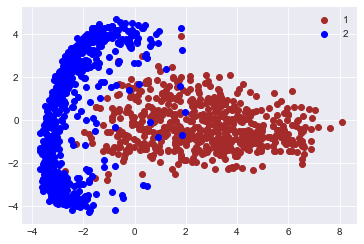

In [35]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('seaborn-darkgrid')
fig = plt.figure()
ax = fig.add_subplot(111)
len1=len(array1)
ax.scatter(X_r[len1:,0],X_r[len1:,1],color="brown",label="1")
ax.scatter(X_r[:len1,0],X_r[:len1,1],color="blue",label="2")
plt.legend()
plt.show()

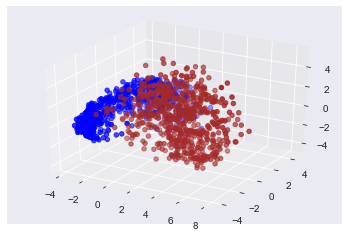

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('seaborn-darkgrid')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
len1=len(array1)
ax.scatter(X_r[len1:,0],X_r[len1:,1],X_r[len1:,2],color="brown")
ax.scatter(X_r[:len1,0],X_r[:len1,1],X_r[:len1,2],color="blue")
plt.show()